# BIA 6304 Final Project - Post game analysis

## By Andrew Pierson and Kristopher Profit

The Kansas City Chiefs football team is debateably one of the hottest teams in the NFL, with 4 wins and 0 losses during 1 home game and 3 away games. 

### Import Packages and Data

In [0]:
# import module(s) into namespace
import pandas as pd   #we almost always need pandas because we like data frames
from bs4 import BeautifulSoup
import requests
import csv
from __future__ import division
pd.set_option('display.max_colwidth', 150) 

In [2]:
!pip install tweepy
import tweepy
from tweepy import OAuthHandler


consumer_key =  'YjZ77yjePvArLtnp4WOBJm6fP'
consumer_secret = 'VIiA3zN1jntdab1QRDEYjCZ4gYAa8tU1mxi3LMqjqjmHMz7iVm'
access_token= '1032395859898626050-WBTdOzBydYK4odmPXy9Ngx5JVLMYTz'
access_secret= 'XnbpZvdNWxHShzdnlrDkyyuxcMJbPQraWFIIdt1IgfWxu'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 


api = tweepy.API(auth)

    100% |████████████████████████████████| 286kB 6.9MB/s 
  Running setup.py bdist_wheel for PySocks ... - done
  Stored in directory: /root/.cache/pip/wheels/22/5c/b5/12e0dfdfa85bea67b23628b6425fae715c687e947a45ee3df9
Successfully built PySocks


In [3]:
#Define an empty dataframe to create a list of tweets that can be printed
results = []

#Define the variables to be used in the api search
latitude = 39.0427
longitude = -94.4837
max_range = 50
hashtag = '#Chiefs'

#Get the first 5000 items based on the search query
for tweet in tweepy.Cursor(api.search, q = hashtag, geocode = '%f,%f,%dkm' % (latitude, longitude, max_range) ).items(1500):
    results.append(tweet)

#Verify the number of list items is 1500
print('API Call Output Type: ', type(results))
print('Tweet Objects: ', len(results))

API Call Output Type:  <class 'list'>
Tweet Objects:  1500


Calling Jacksonville by the county it rests in, Duval, was popularized by rappers in the 1990s, and it has slowly crept its way into game day at EverBank Field.

"Duuuval!" became a rallying cry for Jags since beginning in the early '00s. We will use this commonly used hashtag in order to avoid confusion with tweets about the animal. 

In [4]:
#Define an empty dataframe to create a list of tweets that can be printed
results2 = []

#Define the variables to be used in the api search
latitude2 = 30.3322
longitude2 = -81.6557
max_range2 = 50
hashtag2 = '#DUUUVAL'

#Get the first 1500 items based on the search query
for tweet in tweepy.Cursor(api.search, q = hashtag2, geocode = '%f,%f,%dkm' % (latitude2, longitude2, max_range2) ).items(1500):
    results2.append(tweet)

#Verify the number of list items is 1500
print('API Call Output Type: ', type(results2))
print('Tweet Objects: ', len(results2))

API Call Output Type:  <class 'list'>
Tweet Objects:  1500


## Choose Tweet Objects to mine

* Hashtags included in tweet objects will be important in this project when identifying fanbase loyalty.
* A total count of all of a user's tweets (including retweets and quote tweets) could be closely related to the number of a user's followers. In addition, users that have suspiciously small status counts might be omitted from the analysis due to misrepresentation of tweet population sample or because they are spam accounts.
* The verified tweet object is a boolean value that distinguishes people of interest, such as celebrities or politicians, from normal twitter users.
* Mentions on a tweet will help keep us informed of what people are sharing with others about The Kansas City Chiefs' Organization.
* The language on a majority of these tweets will likely be English (en), other languages have a higher chance of misrepresenting our sample data by including irrelevant tweet objects.
* I chose to include the text object from tweets that contain '#Chiefs' in order to find twitter users interested in the NFL team during the Kansas City Chiefs' preseason. This object was also chosen because it will likely provide insightful text that can be used to determine the underlying sentiment of a user towards the Chiefs. 
* The next two tweet objects that I chose to include in my data frame were the retweet and favorite counts for tweets including '#Chiefs' in their tags. Retweet and favorite counts can be useful when analyzing popularity of a tweet and will likely require different weights if a user is favoriting tweets more often than retweeting. 
* Including the created_at tweet object was done in order to allow the data frame to be sorted in chronological order upon anlysis. This might show trends in popularity or sentiment depending upon the Chiefs performance after a game. 
* A user's name and account description might also allow us to predict the tweet's sentiment, which is why I chose to mine user.name and user.description tweet objects. A case in which this may occur is if an opposing team's fans are including "#Chiefs" in a tweet that has a negative connotation. 
* The user.followers_count object was also  included and could provide interesting information, analyzing this using a forecasting method may indicate impressions on other users. 


In [0]:
#Create a function to convert a given list of tweets into a Pandas DataFrame
#The DataFrame will consist of only chosen values below

def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['TweetHashtags'] = [tweet.entities.get('hashtags') for tweet in tweets]
    DataSet['UserStatusCount'] = [tweet.user.statuses_count for tweet in tweets]
    DataSet['UserVerified'] = [tweet.user.verified for tweet in tweets]
    #DataSet['TweetMentions'] = [tweet.entities.get('user_mentions') for tweet in tweets]
    DataSet['TweetLanguage'] = [tweet.lang for tweet in tweets]
    DataSet['TweetText'] = [tweet.text for tweet in tweets]
    DataSet['TweetRetweetCount'] = [tweet.retweet_count for tweet in tweets]
    DataSet['TweetFavoriteCount'] = [tweet.favorite_count for tweet in tweets]
    DataSet['TweetCreated'] = [tweet.created_at for tweet in tweets]
    #DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    #DataSet['UserFollowerCount'] = [tweet.user.followers_count for tweet in tweets]

    return DataSet

## Create and Populate Data Frames

### Chiefs Data Frame

In [6]:
#Pass the tweets list to create a DataFrame
chiefs_frame = toDataFrame(results)
print('Dataframe Shape (Rows, Columns): ', chiefs_frame.shape)

Dataframe Shape (Rows, Columns):  (1500, 9)


In [7]:
chiefs_frame['TweetText'][0:10]

0    Our Kansas City #Chiefs advance to 5-0!!! Love watching this team this year! Not sure if it's the luxury of youth o… https://t.co/02RxZtoTr9
1                                                                     5-0 #ChiefsKingdom #Chiefs\n\nCoach, your thoughts? https://t.co/KuloY7ubHu
2     A lot of fraterinizing between #chiefs and #jaguar players after the game. Kelce took off his jersey and signed it… https://t.co/d3nrSzxj0S
3                                        RT @JoshVernier610: We’re halfway to finding out what Jags defender Telvon Smith found so funny. #Chiefs
4    RT @jbbrisco: The #Chiefs now have the tiebreakers over the Broncos, Chargers, Steelers and Jaguars. Next week, they’ll have a chance to ta…
5                                                                               Tyreek Hill, #Chiefs “Return Specialist”. https://t.co/FYp0KNyJgM
6                                                                                 #CHIEFS WIN BABY!!!!!!!!!!!!!!!!! 5-0 ON T

In [8]:
chiefs_frame.head()

,TweetHashtags,UserStatusCount,UserVerified,TweetLanguage,TweetText,TweetRetweetCount,TweetFavoriteCount,TweetCreated,userDesc
0,"[{'text': 'Chiefs', 'indices': [16, 23]}]",16260,False,en,Our Kansas City #Chiefs advance to 5-0!!! Love watching this team this year! Not sure if it's the luxury of youth o… https://t.co/02RxZtoTr9,0,0,2018-10-07 20:33:16,"Lover of pizza, beer & all things Kansas City. #Royals #Chiefs"
1,"[{'text': 'ChiefsKingdom', 'indices': [4, 18]}, {'text': 'Chiefs', 'indices': [19, 26]}]",8263,False,en,"5-0 #ChiefsKingdom #Chiefs\n\nCoach, your thoughts? https://t.co/KuloY7ubHu",0,1,2018-10-07 20:32:47,"Big K-State, Chiefs, Cubs, and Royals fan! Big sports fan in general! I try to look at things objectively."
2,"[{'text': 'chiefs', 'indices': [31, 38]}, {'text': 'jaguar', 'indices': [43, 50]}]",5146,False,en,A lot of fraterinizing between #chiefs and #jaguar players after the game. Kelce took off his jersey and signed it… https://t.co/d3nrSzxj0S,0,0,2018-10-07 20:32:43,"Royals, Chiefs and Mizzou Tiger fan."
3,"[{'text': 'Chiefs', 'indices': [97, 104]}]",3825,False,en,RT @JoshVernier610: We’re halfway to finding out what Jags defender Telvon Smith found so funny. #Chiefs,44,0,2018-10-07 20:32:33,
4,"[{'text': 'Chiefs', 'indices': [18, 25]}]",182839,False,en,"RT @jbbrisco: The #Chiefs now have the tiebreakers over the Broncos, Chargers, Steelers and Jaguars. Next week, they’ll have a chance to ta…",11,0,2018-10-07 20:32:28,Chiefs STH PORN RT’er and gamer BF VETERAN #TEAMSAMMY


### Jaguars Data Frame

In [9]:
#Pass the tweets list to create a DataFrame
jaguars_frame = toDataFrame(results2)
print('Dataframe Shape (Rows, Columns): ', jaguars_frame.shape)

Dataframe Shape (Rows, Columns):  (1500, 9)


In [10]:
jaguars_frame['TweetText'][0:10]

0                                                                       RT @Jaguars: Gip with the first pick!\n\n#DUUUVAL https://t.co/vyzisGHiUi
1                                                                       RT @Jaguars: Gip with the first pick!\n\n#DUUUVAL https://t.co/vyzisGHiUi
2    @Crosby2Sprong Unlike many other fans, we stick with our team until the end of every game - win or lose. Sadly, tod… https://t.co/YoGRqJ4yOU
3     @Jaguars wait till the last second to put a 💩💩💩💩topping on this crap performance! Need to take our @NFL chant from… https://t.co/C4oI0CS9Oc
4                                                             I have no one to blame but me not wearing my lucky shirt. Sorry jags fans. #DUUUVAL
5                                                          RT @Jaguars: First INT of the year for @AJBOUYE21!\n\n#DUUUVAL https://t.co/JSGuQo13tB
6                                                          RT @Jaguars: First INT of the year for @AJBOUYE21!\n\n#DUUUVAL ht

In [11]:
jaguars_frame.head()

,TweetHashtags,UserStatusCount,UserVerified,TweetLanguage,TweetText,TweetRetweetCount,TweetFavoriteCount,TweetCreated,userDesc
0,"[{'text': 'DUUUVAL', 'indices': [39, 47]}]",113657,False,en,RT @Jaguars: Gip with the first pick!\n\n#DUUUVAL https://t.co/vyzisGHiUi,117,0,2018-10-07 20:38:55,October Skies🌈😳🙏🏼
1,"[{'text': 'DUUUVAL', 'indices': [39, 47]}]",16680,False,en,RT @Jaguars: Gip with the first pick!\n\n#DUUUVAL https://t.co/vyzisGHiUi,117,0,2018-10-07 20:38:51,#HumbleBeast #JucoProduct #DBU #Ritty🌎 DB @ contra costa #16
2,[],86092,False,en,"@Crosby2Sprong Unlike many other fans, we stick with our team until the end of every game - win or lose. Sadly, tod… https://t.co/YoGRqJ4yOU",0,2,2018-10-07 20:34:52,"Mom, Grandma, loyal Jaguars fan! #Duval"
3,[],1133,False,en,@Jaguars wait till the last second to put a 💩💩💩💩topping on this crap performance! Need to take our @NFL chant from… https://t.co/C4oI0CS9Oc,0,0,2018-10-07 20:31:42,Jaguars Fan! DUVAL is a way of life!
4,"[{'text': 'DUUUVAL', 'indices': [75, 83]}]",975,False,en,I have no one to blame but me not wearing my lucky shirt. Sorry jags fans. #DUUUVAL,0,0,2018-10-07 20:30:58,"NFL Technology & Science Music Gaming Sports Government & Politics. If someone calls you ‘ugly’, have a good comeback and say “Excuse me, I’m not ..."


---

## Count Vectorizer

In [0]:
#Import pandas into the workspace
import pandas as pd
#Import numpy into the workspace
import numpy as np
#Import the CountVectorizer module
from sklearn.feature_extraction.text import CountVectorizer
#Import the math function to do math
import math
#Specify the max width of pixels per column for text that will be analyzed
pd.set_option('display.max_colwidth', 800)

### Count Vectorizer Summary

cv1
*   Parameters: stop_words='english'
*   Feature Space: 1113

cv2
*   Parameters: stop_words='stopwords'
*   Feature Space: 1106

### CV1

In [0]:
#Define the count vectorizer using default parameters
cv1 = CountVectorizer(stop_words='english')

#### Chiefs Feature Space

In [14]:
#Apply the count vectorizer for the bag of words to the dataframe feature
cv1_chiefs_text = cv1.fit_transform(chiefs_frame['TweetText'])
#This is the feature space for TweetText
print('Shape:', cv1_chiefs_text.shape)
#This is the type of matrix that is returned for TweetText
print('Type:', type(cv1_chiefs_text))

Shape: (1500, 2508)
Type: <class 'scipy.sparse.csr.csr_matrix'>


In [15]:
#Print the sparse matrix as a data frame for an aestheticallly pleasing view of the feature space head#Print t 
pd.DataFrame(cv1_chiefs_text.toarray(), columns = cv1.get_feature_names()).head(10)

,02rxztotr9,06,0cblu8dsfk,0cfw4j1z44,0jx4cm7nzp,0kqumlmwmb,0lwvsad0up,0o3rwavemz,0r7q3ilqqe,0sk6dl9iui,...,zodfysit,zodfysitzk,zoinks,zone,zoyx1cvkyt,zs97alxdep,zuzfkivu55,zzwdtl8k5y,øº,øºgo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Most frequently occurring terms:

In [16]:
names = cv1.get_feature_names()   #create list of feature names

count = np.sum(cv1_chiefs_text.toarray(), axis = 0) # convert list to array to add up feature counts 
count2 = count.tolist()  # convert numpy array to list

count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list

sorted_count = count_df.sort_values(['count'], ascending = False)
sorted_count.head(25)

,count
chiefs,1488
https,618
rt,608
jaguars,224
defense,202
mahomes,174
chiefskingdom,161
game,137
jags,98
patrick,91


#### Jaguars Feature Space

In [17]:
#Apply the count vectorizer for the bag of words to the dataframe feature
cv1_jaguars_text = cv1.fit_transform(jaguars_frame['TweetText'])
#This is the feature space for TweetText
print('Shape:', cv1_jaguars_text.shape)
#This is the type of matrix that is returned for TweetText
print('Type:', type(cv1_jaguars_text))

Shape: (1500, 1545)
Type: <class 'scipy.sparse.csr.csr_matrix'>


In [18]:
#Print the sparse matrix as a data frame for an aestheticallly pleasing view of the feature space head#Print t 
pd.DataFrame(cv1_jaguars_text.toarray(), columns = cv1.get_feature_names()).head(10)

,00,04,0axqcymj92,0d1ulua2ri,0dx6a0nb,0hdg2nlvnf,0o3bef0vwa,10,1010x,1010xl,...,z0m3ea5z7n,z1eozwm87v,z6alyoqfu2,zak58oc6fr,zct7,zct7zguez6,zdi9snksuj,zr6skkxxd7,zvfbjlixzv,zyguc2ptr7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Most frequently occurring terms

In [19]:
names = cv1.get_feature_names()   #create list of feature names

count = np.sum(cv1_jaguars_text.toarray(), axis = 0) # convert list to array to add up feature counts 
count2 = count.tolist()  # convert numpy array to list

count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list

sorted_count = count_df.sort_values(['count'], ascending = False)
sorted_count.head(25)

,count
duuuval,1381
https,1314
jaguars,1240
rt,1150
game,348
day,309
arrowhead,139
headed,130
db2tjcd1ih,129
black,129


### CV2

Create custom stopwords list to remove unhelpful words for next count vectorizer

In [0]:
from sklearn.feature_extraction import text
# Add more stopwords to standard english 
mylist = ['rt', '&', 'amp','pff','http','website','retweet','fi','fbs','https','years','uh2bpyg3gu','just','calling','intervi','traffic','shut']
stopwords = text.ENGLISH_STOP_WORDS.union(mylist)

In [0]:
#Define the count vectorizer using stopwords custom parameter
cv2 = CountVectorizer(stop_words=stopwords, min_df = .02)

#### Chiefs Feature Space

In [22]:
#Apply the count vectorizer for the bag of words to the dataframe feature
cv2_chiefs_text = cv2.fit_transform(chiefs_frame['TweetText'])
#This is the feature space for TweetText
print('Shape:', cv2_chiefs_text.shape)
#This is the type of matrix that is returned for TweetText
print('Type:', type(cv2_chiefs_text))

Shape: (1500, 63)
Type: <class 'scipy.sparse.csr.csr_matrix'>


In [23]:
#Print the sparse matrix as a data frame for an aestheticallly pleasing view of the feature space head#Print t 
pd.DataFrame(cv2_chiefs_text.toarray(), columns = cv2.get_feature_names()).head(10)

,20,30,andrew__carter,arrowhead,arrowheadpride,b7a35zkasg,bortles,care,chiefs,chiefskingdom,...,td,telvon,thinks,today,tomkctv5,ve,vs,week,won,year
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Most frequently occurring terms:

In [24]:
names = cv2.get_feature_names()   #create list of feature names

count = np.sum(cv2_chiefs_text.toarray(), axis = 0) # convert list to array to add up feature counts 
count2 = count.tolist()  # convert numpy array to list

count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list

sorted_count = count_df.sort_values(['count'], ascending = False)
sorted_count.head(15)

,count
chiefs,1488
jaguars,224
defense,202
mahomes,174
chiefskingdom,161
game,137
jags,98
patrick,91
good,82
tomkctv5,78


#### Jaguars Feature Space

In [25]:
#Apply the count vectorizer for the bag of words to the dataframe feature
cv2_jaguars_text = cv2.fit_transform(jaguars_frame['TweetText'])
#This is the feature space for TweetText
print('Shape:', cv2_jaguars_text.shape)
#This is the type of matrix that is returned for TweetText
print('Type:', type(cv2_jaguars_text))

Shape: (1500, 49)
Type: <class 'scipy.sparse.csr.csr_matrix'>


In [26]:
#Print the sparse matrix as a data frame for an aestheticallly pleasing view of the feature space head#Print t 
pd.DataFrame(cv2_jaguars_text.toarray(), columns = cv2.get_feature_names()).head(10)

,04,24,ajbouye21,arrowhead,big,black,bortles,chiefs,day,db2tjcd1ih,...,vs,vyzisghiui,wanna,week,white,work,x03f1ueikn,yanngetsacks91,year,yp2g7bj79n
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Most frequently occurring terms:

In [27]:
names = cv2.get_feature_names()   #create list of feature names

count = np.sum(cv2_jaguars_text.toarray(), axis = 0) # convert list to array to add up feature counts 
count2 = count.tolist()  # convert numpy array to list

count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list

sorted_count = count_df.sort_values(['count'], ascending = False)
sorted_count.head(15)

,count
duuuval,1381
jaguars,1240
game,348
day,309
arrowhead,139
headed,130
pants,129
black,129
tops,129
db2tjcd1ih,129


---

## Sentiment Analysis

Sentiment analysis will be performed to gain insight into the the tone of Tweets regarding Kavanaugh. The results will be used to generate a target variable for predictive modeling.

### Sentiment Analysis Summary

AFINN Dictionary
*   Rendered all tweets as being neutral in sentiment

HL Dictionary
*   

### AFINN Dictionary

#### Define AFINN classes

This part is to allow google collaboratory to upload locally saved files into the drive

In [28]:
#Use google.colab to import dictionaries
from google.colab import files

#Choose file(s) to upload
uploaded = files.upload()

Saving AFINN-111.txt to AFINN-111.txt
Saving HLneg.txt to HLneg.txt
Saving HLpos.txt to HLpos.txt


In [29]:
#Run foreloop to execute the file upload
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "AFINN-111.txt" with length 28093 bytes
User uploaded file "HLneg.txt" with length 44758 bytes
User uploaded file "HLpos.txt" with length 19093 bytes


In [30]:
# Sentiment dictionary that assigns scores to words signifying their sentiment polarity or neutrality

afinn = {}
for line in open("AFINN-111.txt"):
    tt = line.split('\t')
    afinn.update({tt[0]:int(tt[1])})


print(type(afinn), len(afinn))

for key, value in sorted(afinn.items())[0:10]:
    print(key + " => " + str(value))
print("~~~~~~~~~~~~")
for key, value in sorted(afinn.items())[2467:]:
    print(key + " => " + str(value))

<class 'dict'> 2477
abandon => -2
abandoned => -2
abandons => -2
abducted => -2
abduction => -2
abductions => -2
abhor => -3
abhorred => -3
abhorrent => -3
abhors => -3
~~~~~~~~~~~~
yeah => 1
yearning => 1
yeees => 2
yes => 1
youthful => 2
yucky => -2
yummy => 3
zealot => -2
zealots => -2
zealous => 2


In [0]:
# here we are going for strictly the sum:  add up the positives and "subtract" the negatives
# you can return a number or a label

def afinn_sent(inputstring):
    
    sentcount =0
    for word in inputstring.split():  
        if word.rstrip('?:!.,;') in afinn:
            sentcount = sentcount + afinn[word.rstrip('?:!.,;')]
            
    
    if (sentcount < 0):
        sentiment = 'Negative'
    elif (sentcount >0):
        sentiment = 'Positive'
    else:
        sentiment = 'Neutral'
    
    return sentiment
    #return sentcount

#### Chiefs AFINN Sentiment

In [32]:
chiefs_frame['afinn'] = chiefs_frame["TweetText"].apply(lambda x: afinn_sent(x))
print(type(chiefs_frame['TweetText']))

<class 'pandas.core.series.Series'>


In [33]:
chiefs_frame.iloc[0:10][['TweetText','afinn']]

,TweetText,afinn
0,Our Kansas City #Chiefs advance to 5-0!!! Love watching this team this year! Not sure if it's the luxury of youth o… https://t.co/02RxZtoTr9,Neutral
1,"5-0 #ChiefsKingdom #Chiefs\n\nCoach, your thoughts? https://t.co/KuloY7ubHu",Neutral
2,A lot of fraterinizing between #chiefs and #jaguar players after the game. Kelce took off his jersey and signed it… https://t.co/d3nrSzxj0S,Neutral
3,RT @JoshVernier610: We’re halfway to finding out what Jags defender Telvon Smith found so funny. #Chiefs,Positive
4,"RT @jbbrisco: The #Chiefs now have the tiebreakers over the Broncos, Chargers, Steelers and Jaguars. Next week, they’ll have a chance to ta…",Positive
5,"Tyreek Hill, #Chiefs “Return Specialist”. https://t.co/FYp0KNyJgM",Neutral
6,#CHIEFS WIN BABY!!!!!!!!!!!!!!!!! 5-0 ON THAT ASS!!!!!!!!!!!!!!,Neutral
7,RT @TheChiefsWire: #Chiefs OLB Dee Ford disqualified following second unsportsmanlike penalty https://t.co/3BVL3i8Fmx,Negative
8,#Chiefs Win! #KC is 5-0! 🔥\n\n🏈 Chiefs Tickets on Sale Now 👉 https://t.co/XojrKc3Wah https://t.co/AVixbVLYw9,Neutral
9,"RT @jbbrisco: The #Chiefs now have the tiebreakers over the Broncos, Chargers, Steelers and Jaguars. Next week, they’ll have a chance to ta…",Positive


In [34]:
chiefs_frame.iloc[1490:1501][['TweetText','afinn']]

,TweetText,afinn
1490,You know the boy still Chopping It Up! This is how we rep at Chiefs Kingdom 👑 🏈💯...\n.\n“Chop It Up “\n.\nYouTube link… https://t.co/PSCdgGrlaY,Neutral
1491,RT @TomKCTV5: The #Chiefs are giving fans a heads up about strong potential for rain Sunday... hopefully it won't take after the legendary…,Positive
1492,RT @ArrowheadPride: 🚨WATCH PARTY ALERT🚨\n\nCome watch the #Chiefs beat the Patriots with us https://t.co/MalOPXsj2p,Neutral
1493,RT @ArrowheadPride: 🚨WATCH PARTY ALERT🚨\n\nCome watch the #Chiefs beat the Patriots with us https://t.co/MalOPXsj2p,Neutral
1494,RT @ArrowheadPride: 🚨WATCH PARTY ALERT🚨\n\nCome watch the #Chiefs beat the Patriots with us https://t.co/MalOPXsj2p,Neutral
1495,🚨WATCH PARTY ALERT🚨\n\nCome watch the #Chiefs beat the Patriots with us https://t.co/MalOPXsj2p,Neutral
1496,#Tailgating or Couchgating this weekend Pulled Pork $10.99lb SAVE $2! #BBQ #CGEBBQ #KCBBQ #OlatheBBQ #Football… https://t.co/28EqGnigil,Neutral
1497,RT @LWorthySports: Strength vs Strength on Sunday at Arrowhead Stadium when the #Chiefs offense and the #Jaguars defense clash. https://t.c…,Negative
1498,Well played #Chiefs 😅😅 https://t.co/EyehW2COWl,Neutral
1499,RT @LWorthySports: Strength vs Strength on Sunday at Arrowhead Stadium when the #Chiefs offense and the #Jaguars defense clash. https://t.c…,Negative


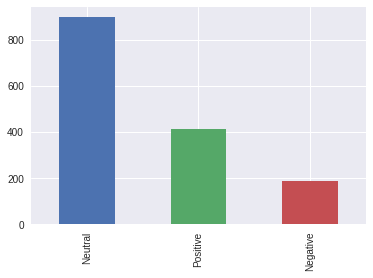

In [35]:
# What does the sentiment distribution look like?
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
chiefs_frame['afinn'].value_counts().plot(kind='bar')

#### Jaguars AFINN Sentiment

In [36]:
jaguars_frame['afinn'] = jaguars_frame["TweetText"].apply(lambda x: afinn_sent(x))
print(type(jaguars_frame['TweetText']))

<class 'pandas.core.series.Series'>


In [37]:
jaguars_frame.iloc[0:10][['TweetText','afinn']]

,TweetText,afinn
0,RT @Jaguars: Gip with the first pick!\n\n#DUUUVAL https://t.co/vyzisGHiUi,Neutral
1,RT @Jaguars: Gip with the first pick!\n\n#DUUUVAL https://t.co/vyzisGHiUi,Neutral
2,"@Crosby2Sprong Unlike many other fans, we stick with our team until the end of every game - win or lose. Sadly, tod… https://t.co/YoGRqJ4yOU",Positive
3,@Jaguars wait till the last second to put a 💩💩💩💩topping on this crap performance! Need to take our @NFL chant from… https://t.co/C4oI0CS9Oc,Negative
4,I have no one to blame but me not wearing my lucky shirt. Sorry jags fans. #DUUUVAL,Neutral
5,RT @Jaguars: First INT of the year for @AJBOUYE21!\n\n#DUUUVAL https://t.co/JSGuQo13tB,Neutral
6,RT @Jaguars: First INT of the year for @AJBOUYE21!\n\n#DUUUVAL https://t.co/JSGuQo13tB,Neutral
7,@ArrowheadPride @BigCatCountry First off @APMarkLong can suck a dick. The real #meth4money chiefs played a good gam… https://t.co/tpfVMr4qgM,Negative
8,It's not like we will see KC in the playoffs. 👀 #duuuval,Positive
9,RT @Jaguars: First INT of the year for @AJBOUYE21!\n\n#DUUUVAL https://t.co/JSGuQo13tB,Neutral


In [38]:
jaguars_frame.iloc[1490:1501][['TweetText','afinn']]

,TweetText,afinn
1490,"We ain't here for participation trophies, orange slices and juice boxes. #DUUUVAL has been lampooned &amp; kicked aroun… https://t.co/1wpazhZAVp",Neutral
1491,RT @Jaguars: That #VictoryMonday feeling.\n\n@JoshLambo | #DUUUVAL https://t.co/NHymLPsNL8,Positive
1492,@Jaguars we will expose the @Chiefs defense this Sunday bet on that #DUUUVAL,Negative
1493,RT @ActionSportsJax: It's @Jaguars All Access Overtime as @BrentASJax and @logs56 chat with @DedeTHEGreat11 and @Campbell93 after Monday's…,Neutral
1494,RT @ActionSportsJax: It's @Jaguars All Access Overtime as @BrentASJax and @logs56 chat with @DedeTHEGreat11 and @Campbell93 after Monday's…,Neutral
1495,RT @ActionSportsJax: It's @Jaguars All Access Overtime as @BrentASJax and @logs56 chat with @DedeTHEGreat11 and @Campbell93 after Monday's…,Neutral
1496,It's @Jaguars All Access Overtime as @BrentASJax and @logs56 chat with @DedeTHEGreat11 and @Campbell93 after Monday… https://t.co/TF0x5bHq8y,Neutral
1497,"RT @Jaguars: Career high 9 catch, 130 yards for @DedeTHEGreat11 \n\n#DUUUVAL https://t.co/tsJsdgBmNZ",Neutral
1498,Espero que o Chiefs ganhe de uns 30 a 0 hj só pra eles se iludirem e não esperarem o pau que vão levar no domingo #nflnaespn #DUUUVAL,Negative
1499,WELL DONE! 👊🏻#DUUUVAL #Jaguars https://t.co/5FM7k4ihNi,Neutral


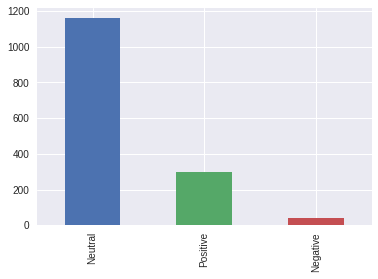

In [39]:
# What does the sentiment distribution look like?
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
jaguars_frame['afinn'].value_counts().plot(kind='bar')

### HL Dictionary

#### Define HL classes

In [40]:
HLpos = "HLpos.txt"
HLneg = "HLneg.txt"
print("HL pos  size: " + str(len(HLpos)))
print(HLpos[0:10])
print("HL neg  size: " + str(len(HLneg)))
print(HLneg[0:10])

# different dictionary
# different measure

def hl_sent(inputstring):

    poscount = 0
    negcount = 0
    
    for word in inputstring.split(): 
        if HLpos.count(word.rstrip('?:!.,;')):
            poscount +=1
        elif HLneg.count(word.rstrip('?:!.,;')):
            negcount +=1
     
    
    if poscount+negcount > 0:
        t = float((poscount - negcount)/(poscount+negcount))    
    else:
        t = 0
    
    
    if t > 0:
        tone = "Positive"
    elif t < 0:
        tone = "Negative"
    else:
        tone = "Neutral"
    
    return tone

HL pos  size: 9
HLpos.txt
HL neg  size: 9
HLneg.txt


#### Chiefs HL Sentiment

In [0]:
chiefs_frame['hlsent'] = chiefs_frame["TweetText"].apply(lambda x: hl_sent(x))

In [42]:
chiefs_frame.iloc[0:10][['TweetText','afinn', 'hlsent']]

,TweetText,afinn,hlsent
0,Our Kansas City #Chiefs advance to 5-0!!! Love watching this team this year! Not sure if it's the luxury of youth o… https://t.co/02RxZtoTr9,Neutral,Neutral
1,"5-0 #ChiefsKingdom #Chiefs\n\nCoach, your thoughts? https://t.co/KuloY7ubHu",Neutral,Neutral
2,A lot of fraterinizing between #chiefs and #jaguar players after the game. Kelce took off his jersey and signed it… https://t.co/d3nrSzxj0S,Neutral,Neutral
3,RT @JoshVernier610: We’re halfway to finding out what Jags defender Telvon Smith found so funny. #Chiefs,Positive,Neutral
4,"RT @jbbrisco: The #Chiefs now have the tiebreakers over the Broncos, Chargers, Steelers and Jaguars. Next week, they’ll have a chance to ta…",Positive,Neutral
5,"Tyreek Hill, #Chiefs “Return Specialist”. https://t.co/FYp0KNyJgM",Neutral,Neutral
6,#CHIEFS WIN BABY!!!!!!!!!!!!!!!!! 5-0 ON THAT ASS!!!!!!!!!!!!!!,Neutral,Neutral
7,RT @TheChiefsWire: #Chiefs OLB Dee Ford disqualified following second unsportsmanlike penalty https://t.co/3BVL3i8Fmx,Negative,Neutral
8,#Chiefs Win! #KC is 5-0! 🔥\n\n🏈 Chiefs Tickets on Sale Now 👉 https://t.co/XojrKc3Wah https://t.co/AVixbVLYw9,Neutral,Neutral
9,"RT @jbbrisco: The #Chiefs now have the tiebreakers over the Broncos, Chargers, Steelers and Jaguars. Next week, they’ll have a chance to ta…",Positive,Neutral


At first glance, it is clear that the HL dictionary has labeled the tweet sentiments with higher polarity. The distribution of the senitment labels will be illustrated below.

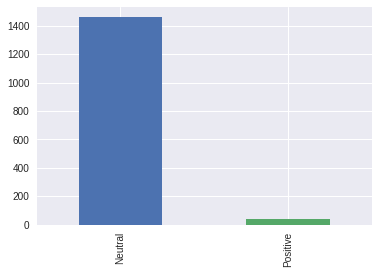

In [43]:
# What does the sentiment distribution look like?
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
chiefs_frame['hlsent'].value_counts().plot(kind='bar')

Although the neutral sentiment label still holds a large majority in the senitment distribution, there are enough negative and positive sentiment labels to aid in the analysis. The even distribution between negative and positive labels is interesting. Since the Tweets were scraped from the day when the FBI released its investigation of sexual assault allegations, and since news has indicated that the FBI did not find any incriminating evidence, it makes sense that there would be an even split on either side's sentiment. It may be too early to determine this, however. 

#### Jaguars HL Sentiment

In [0]:
jaguars_frame['hlsent'] = jaguars_frame["TweetText"].apply(lambda x: hl_sent(x))

In [45]:
jaguars_frame.iloc[0:10][['TweetText','afinn', 'hlsent']]

,TweetText,afinn,hlsent
0,RT @Jaguars: Gip with the first pick!\n\n#DUUUVAL https://t.co/vyzisGHiUi,Neutral,Neutral
1,RT @Jaguars: Gip with the first pick!\n\n#DUUUVAL https://t.co/vyzisGHiUi,Neutral,Neutral
2,"@Crosby2Sprong Unlike many other fans, we stick with our team until the end of every game - win or lose. Sadly, tod… https://t.co/YoGRqJ4yOU",Positive,Neutral
3,@Jaguars wait till the last second to put a 💩💩💩💩topping on this crap performance! Need to take our @NFL chant from… https://t.co/C4oI0CS9Oc,Negative,Neutral
4,I have no one to blame but me not wearing my lucky shirt. Sorry jags fans. #DUUUVAL,Neutral,Neutral
5,RT @Jaguars: First INT of the year for @AJBOUYE21!\n\n#DUUUVAL https://t.co/JSGuQo13tB,Neutral,Neutral
6,RT @Jaguars: First INT of the year for @AJBOUYE21!\n\n#DUUUVAL https://t.co/JSGuQo13tB,Neutral,Neutral
7,@ArrowheadPride @BigCatCountry First off @APMarkLong can suck a dick. The real #meth4money chiefs played a good gam… https://t.co/tpfVMr4qgM,Negative,Neutral
8,It's not like we will see KC in the playoffs. 👀 #duuuval,Positive,Neutral
9,RT @Jaguars: First INT of the year for @AJBOUYE21!\n\n#DUUUVAL https://t.co/JSGuQo13tB,Neutral,Neutral


At first glance, it is clear that the HL dictionary has labeled the tweet sentiments with higher polarity. The distribution of the senitment labels will be illustrated below.

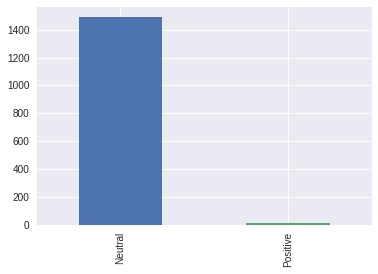

In [46]:
# What does the sentiment distribution look like?
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
jaguars_frame['hlsent'].value_counts().plot(kind='bar')

Although the neutral sentiment label still holds a large majority in the senitment distribution, there are enough negative and positive sentiment labels to aid in the analysis. The even distribution between negative and positive labels is interesting. Since the Tweets were scraped from the day when the FBI released its investigation of sexual assault allegations, and since news has indicated that the FBI did not find any incriminating evidence, it makes sense that there would be an even split on either side's sentiment. It may be too early to determine this, however. 

## Amplification and Negation

We will add amplifying and negating weights onto the words in the Tweets to see if and how it affects the sentiment labels.

In [0]:
#more complicated sentiment calculations
#create all the dictionaries just once

#amplification and negation words from qdap
negate = ["aint", "arent","cant", "couldnt" , "didnt" , "doesnt" ,"dont" ,"hasnt" , 
          "isnt" ,"mightnt" , "mustnt" ,"neither" ,"never", "no" ,"nobody" , "nor", 
          "not" , "shant", "shouldnt", "wasnt" , "werent" ,"wont", "wouldnt"]
amplify = ["acute" ,"acutely", "certain", "certainly" ,"colossal", "colossally",
           "deep" , "deeply" , "definite","definitely" ,"enormous","enormously" , 
           "extreme", "extremely" ,"great","greatly" ,"heavily", "heavy", "high",
           "highly" ,"huge","hugely" , "immense", "immensely" ,"incalculable" ,
           "incalculably","massive", "massively", "more","particular" ,"particularly",
           "purpose", "purposely", "quite" ,"real" ,"really","serious", "seriously", 
           "severe","severely" ,"significant" ,"significantly","sure","surely" , "true" ,
           "truly" ,"vast" , "vastly" , "very"]

In [0]:
def hl_sent2(inputstring):

    poscount = 0
    negcount = 0
    i = 0


    for word in inputstring.split():
        if i > 0:
            prev = inputstring.split().pop(i-1)
        else:
            prev =""

        if HLpos.count(word):
            if negate.count(prev):
                negcount += 1
            elif amplify.count(prev):
                poscount +=2
            else: 
                poscount +=1
        elif HLneg.count(word):
            if negate.count(prev):
                poscount += 1
            elif amplify.count(prev):
                negcount +=2
            else:
                negcount +=1
        i+=1
    
    if poscount+negcount > 0:
        t = float((poscount - negcount)/(poscount+negcount))
        
    else:
        t = 0
    
    
    if t > 0:
        tone = "Positive"
    elif t < 0:
        tone = "Negative"
    else:
        tone = "Neutral"
    
    return tone

### Chiefs Sentiment 

In [0]:
chiefs_frame['hl_sent2'] = chiefs_frame["TweetText"].apply(lambda x: hl_sent2(x))

In [50]:
chiefs_frame.iloc[490:501]['hl_sent2']

490    Neutral
491    Neutral
492    Neutral
493    Neutral
494    Neutral
495    Neutral
496    Neutral
497    Neutral
498    Neutral
499    Neutral
500    Neutral
Name: hl_sent2, dtype: object

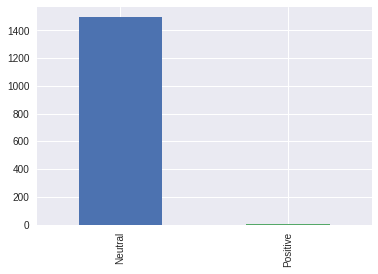

In [51]:
# What does the sentiment distribution look like?
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
chiefs_frame['hl_sent2'].value_counts().plot(kind='bar')

Adding amplification and negation to the list of words does not seem to have changed anything in the distribution of sentiment labels. 

### Jaguars Sentiment

In [0]:
jaguars_frame['hl_sent2'] = jaguars_frame["TweetText"].apply(lambda x: hl_sent2(x))

In [53]:
jaguars_frame.iloc[490:501]['hl_sent2']

490    Neutral
491    Neutral
492    Neutral
493    Neutral
494    Neutral
495    Neutral
496    Neutral
497    Neutral
498    Neutral
499    Neutral
500    Neutral
Name: hl_sent2, dtype: object

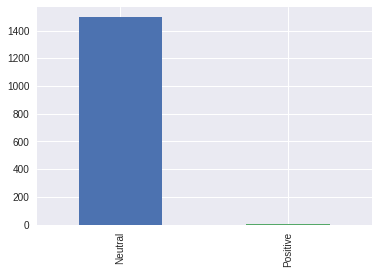

In [54]:
# What does the sentiment distribution look like?
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
jaguars_frame['hl_sent2'].value_counts().plot(kind='bar')

Adding amplification and negation to the list of words does not seem to have changed anything in the distribution of sentiment labels. 